# Home assignment - Non-Neural Machine Learning (ITLB358, MIB)
---
## Task description
You will process real-life data which includes the prices of a digital currency.
- The data represents historical daily time series for a digital currency (BTC) traded on the Saudi market (SAR/Sudi Riyal).
- Prices and volumes are quoted in both SAR & USD.
- Data date range: 11.05.2018 to 30.01.2021

### Your task is as follows:
- What are the steps if the dataset were "big data"?
	- Theoretical question!
	- Please create a code in a markdown cell, which represents a basic big data pipeline (with explicative steps).
	- If you want use pseudo code.
- Download the Digital currency dataset from google drive
	- `!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"`
- Clean the data as necessary
- Modelling:
	- Regression
		- Linear Regression (baseline)
		- Random forest regressor
		- Split data into inputs and outputs
		- Split data into train and test set
		- Input features:
			- year, open_SAR, open_USD, high_SAR, high_USD, low_SAR, low_USD, close_SAR, volume
		- Output feature(s):
			- close_USD
			- Try to predict 2 different periods (1 day / 2 days ahead) on the test set!
- Reflection
	- Critically evaluate your work, including other approaches.
	- Answer in a markdown cell.


## Step 1 - Visualize the data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [2]:
# generate a seed for reproductibility
random_seed = 69420
np.random.seed(random_seed)

# read the data
df = pd.read_csv('dc.csv', parse_dates=["Unnamed: 0"])
# rename the un-named column re-index the dataset to the 'date' column
df.rename(columns= {"Unnamed: 0" : "date"}, inplace=True)
df.set_index("date", inplace=True)
# sort the data by date
df.sort_index(ascending=True, inplace=True)
# drop NaN values
df.dropna(inplace=True)
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


In [3]:
# inspect new data
df2 = df[['close_USD']]
print(df2)
print(df2.info())

            close_USD
date                 
2018-05-07    9365.00
2018-05-08    9187.56
2018-05-09    9310.00
2018-05-10    9002.20
2018-05-11    8400.00
...               ...
2021-01-26   32467.77
2021-01-27   30366.15
2021-01-28   33364.86
2021-01-29   34252.20
2021-01-30   34218.54

[1000 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-05-07 to 2021-01-30
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close_USD  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB
None


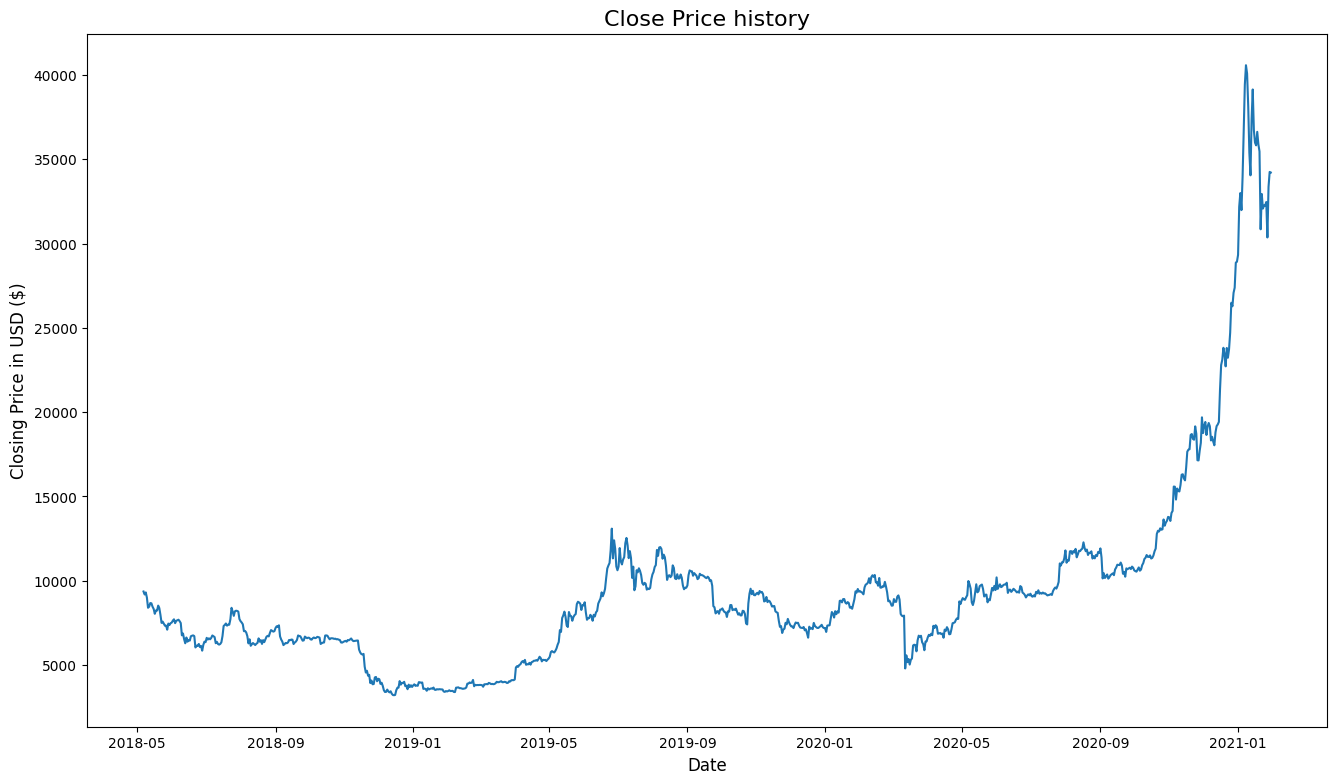

In [4]:
# visualize the data
fig, ax = plt.subplots(figsize=(16,9))
plt.plot(df2["close_USD"])
ax.set_title('Close Price history', fontsize = 16)
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price in USD ($)', fontsize = 12)
plt.show()

## Predict Stock Prices 
### Random Forest Regression Model

In [6]:
x = df.loc[:, df.columns != 'close_USD']
y = df['close_USD']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2,  random_state=random_seed)

In [8]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [9]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 1, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 11, 'bootstrap': False}


In [10]:
# apply the parameters into the model
model = RandomForestRegressor(random_state=1, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=False)

#fit the model
model.fit(x_train, y_train)

# Use model to make predictions
y_pred = model.predict(x_test)

print(y_pred ,'\n')
print('Shape of data:\n-----------------------------------------')
print(y_pred.shape)

[11663.0606      5104.39135     5173.50752     3589.00771333
 10669.99186     9198.73255     6717.096175    9470.85276
 16147.22362     8614.43        4105.5564      7357.20457
  3769.19333333 10681.55194    10373.94606     3912.70669
  9175.68183     8173.021305    6346.71104     6239.391828
  7979.93        7384.36442     9353.77031     3224.17
  6625.195       6977.99146    10875.89561    10779.2575
  9010.227      10134.35        7503.53795     9232.82
  7358.50593     7559.52594     6346.71104     5166.07386
  9540.73108     8223.655      35954.55209     7203.383255
 13038.09022     6635.98        7412.41        8895.45814
  9678.87161333  8614.43       18380.83003     8557.70579
  9195.08        8753.57865     5027.79468     6739.94330667
  9509.32669     6296.46        9447.655935   10229.63
 10229.63       10298.85072    11399.45312    32720.3146
  9437.17408    11923.6524325   7333.91028     4279.40846
  8810.139375    6874.78052     9624.89        7256.203336
 13696.0363     

In [11]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, y_pred), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')

errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 35.0863
Mean Squared Error: 9189.198
Root Mean Squared Error: 95.8603
(R^2) Score: 0.9997
Train Score : 100.00% and Test Score : 99.97% using Random Tree Regressor.
Accuracy: 99.71 %.


In [12]:
predictions = pd.DataFrame({"Predictions": y_pred}, index=pd.date_range(start=df.index[-1], periods=len(y_pred), freq="D"))
predictions.index.name = 'date'
predictions.to_csv("Predicted-price-data.csv")

twodays_df = pd.DataFrame(predictions[:3])
twodays_df.to_csv("two-days-prediction.csv")

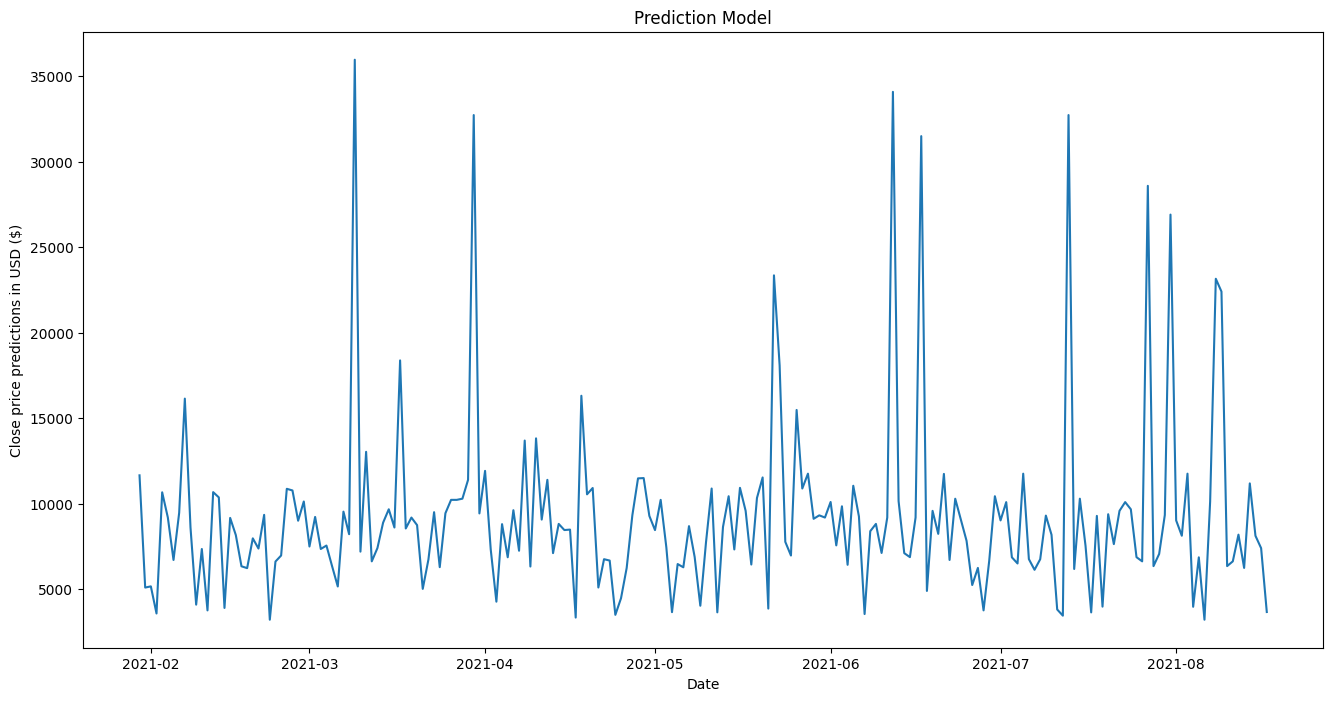

In [13]:
# Visualize the prediction data
plt.figure(figsize=(16,8))
plt.title('Predicted Model')
plt.xlabel('Date')
plt.ylabel('Close price predictions in USD ($)')
plt.plot(predictions['Predictions'])
plt.show()

Buy price and date
            Predictions
date                   
2021-01-31   5104.39135
Sell price and date
            Predictions
date                   
2021-01-30   11663.0606


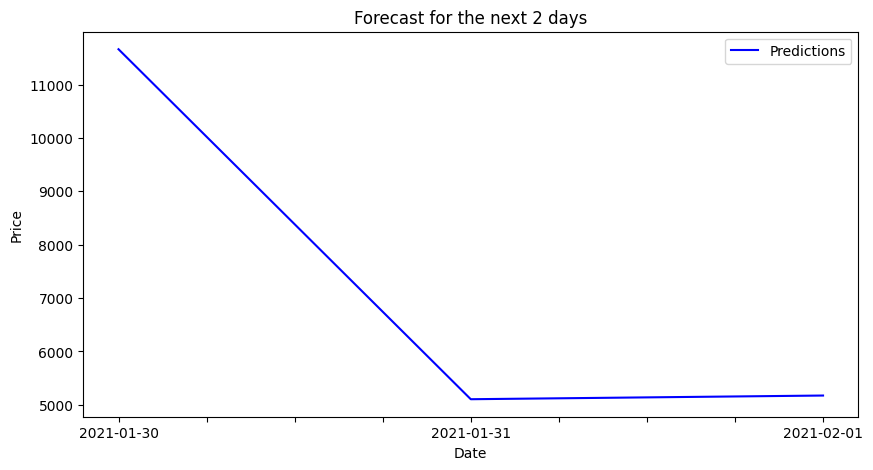

In [14]:
twodays_df = pd.read_csv("two-days-prediction.csv")
twodays_df.set_index("date", inplace=True)
buy_price = min(twodays_df["Predictions"])
sell_price = max(twodays_df["Predictions"])
fivedays_buy = twodays_df.loc[twodays_df["Predictions"] == buy_price]
fivedays_sell = twodays_df.loc[twodays_df["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)

twodays_df["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 2 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### Linear Regression Model

In [ ]:
# Import model
model = LinearRegression()
# Set the X and the Y to train and test data
X = df['date']
y = df['close_USD']
# Splitting the datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3, random_state=random_seed)

In [ ]:
print("X_train:\t")
print(X_train)
print("----------")
print("X_test:")
print(X_test)
print("----------")
print("y_train:")
print(y_train)
print("----------")
print("y_test:")
print(y_test)
print()
print("Ratio of 1 in y in train: {0:.2f}%".format(sum(y_train)/len(y_train)*100))
print("Ratio of 1 in y in test: {0:.2f}%".format(sum(y_test)/len(y_test)*100))